In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('movies.csv.xlsx')

In [4]:
rf = pd.read_excel('ratings.xlsx')

In [6]:
df.shape

(9125, 3)

In [7]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
rf.shape

(100836, 4)

In [9]:
rf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
# Joining the movie and the rating dataframes on 'movieId' as it is common between both
# Inner join takes common values between the two dataframes


df = pd.merge(df, rf, on = 'movieId', how = 'inner')

In [12]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [13]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [14]:
# Dropping movieId, userId and timestamp as these are not required

df = df.drop(['movieId', 'userId', 'timestamp'], axis = 1)
df.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [15]:
# To get the mean rating of a movie inplace of individual rating per movie

df = df.pivot_table(df, index = ['title', 'genres'], aggfunc = 'mean')

In [16]:
df

,,rating
title,genres,
(500) Days of Summer (2009),Comedy|Drama|Romance,3.666667
*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi,3.285714
...And Justice for All (1979),Drama|Thriller,3.166667
1-900 (06) (1994),Drama|Romance,4.000000
10 (1979),Comedy|Romance,3.375000
...,...,...
night Mother (1986),Drama,3.000000
xXx (2002),Action|Crime|Thriller,2.770833
xXx: State of the Union (2005),Action|Crime|Thriller,2.000000


In [17]:
# Changing the index as it was taking title and genres as index before

df.reset_index(level = ['title', 'genres'], inplace = True)

In [18]:
df

,title,genres,rating
0,(500) Days of Summer (2009),Comedy|Drama|Romance,3.666667
1,*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi,3.285714
2,...And Justice for All (1979),Drama|Thriller,3.166667
3,1-900 (06) (1994),Drama|Romance,4.000000
4,10 (1979),Comedy|Romance,3.375000
...,...,...,...
7067,night Mother (1986),Drama,3.000000
7068,xXx (2002),Action|Crime|Thriller,2.770833
7069,xXx: State of the Union (2005),Action|Crime|Thriller,2.000000
7070,¡Three Amigos! (1986),Comedy|Western,3.134615


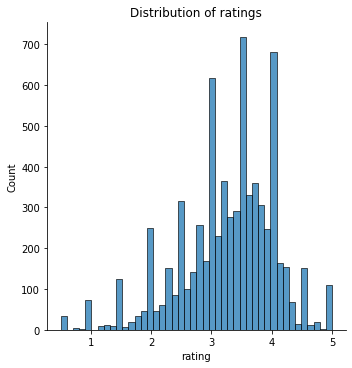

In [19]:
# From this graph, we find that the average rating is somewhere between 3 and 4

plt.rcParams['figure.figsize'] = (8, 3)
sns.displot(df['rating'])
plt.title("Distribution of ratings")
plt.show()

In [21]:
df.head()

,title,genres,rating
0,(500) Days of Summer (2009),Comedy|Drama|Romance,3.666667
1,*batteries not included (1987),Children|Comedy|Fantasy|Sci-Fi,3.285714
2,...And Justice for All (1979),Drama|Thriller,3.166667
3,1-900 (06) (1994),Drama|Romance,4.000000
4,10 (1979),Comedy|Romance,3.375000


In [23]:
# If we want to find number of movies released in each year

df['y'] = df['title'].str.split(" ")
df['year'] = df['y'].apply(lambda x: x[-1])
df = df.drop(['y'], axis = 1)
df['year'] = df['year'].str.strip(")")
df['year'] = df['year'].str.strip("(")
pd.set_option("max_rows", 110)
df['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
1998    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2007    195
2005    195
2009    190
2008    189
2011    181
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1986    115
1989    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1955     32
1975     32
1959     32
1962     32
1965     32
1976     31
1964     31
1972     30
1966     30
1960     30
1963     29
1967     28
1968     28
1957     26
1953     26
1961     25
1958     24
1970     23
1969     22
1956     22
1939     20
1942     20
1954     20
1947     17
1940     17
1950     16
1946     16
1948     16
1951     16
1949     15
1941     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1932      8
1933      8
1934